<a href="https://colab.research.google.com/github/kumar-sendhi/courseraml/blob/master/Sentimentprojectv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install tweepy
!pip install textblob 
!pip install wordcloud

In [4]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
log = pd.read_csv("sample_data/Login.csv")

consumerkey=log['key'][0]
consumersecret=log['key'][1]
accesstoken=log['key'][2]
accesstokensecret=log['key'][3]

In [8]:
authenticate =tweepy.OAuthHandler(consumerkey,consumersecret)
authenticate.set_access_token(accesstoken,accesstokensecret)

api=tweepy.API(authenticate,wait_on_rate_limit=True)

In [9]:
import csv
csvFile = open('tweet.csv', 'a')
csvWriter = csv.writer(csvFile)


In [ ]:
searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

post= api.search(q = searchTerm +" -filter:retweets", count = noofsearch, lang= "en", tweet_mode= "extended")
print("recent posts")
i=1
for tweet in post [0:10]:
    print(str(i) + ')' + tweet.full_text + '\n')
    i=i+1

enter keyword/hashtag to be searched about : trump
Enter how many tweets to analyse : 100
recent posts
1)@atensnut None.
19 died in the first trial: all veterans.
19 Veterans DEAD because Trump had some money to make again.
Lers try injecting some lysol!

2)@TUmarkwoods Since #Trump has a record of skipping town without pay his bills, as a tax paying citizen of #Jacksonville I demand all bills be paid in full prior to the convention. Let’s treat the #rnc2020 as any wedding supplier &amp; vendor would.

3)Republicans on twitter divided over the Trump Russia bounty story. One camp think it’s FAKE NEWS! The other proclaim Obama/Biden and Schiff knew and did nothing.

Interesting how different their conclusions are, based off the same information available to all.

4)And what will President Trump do.

You know he isn't cold hearted and knows there are Minnsotians that need help.

What will our great President decide.

#Trump2020Landslide https://t.co/qS020PK8FO

5)@RaheemKassam Because TRU

In [16]:
searchTerm = input("enter keyword/hashtag to be searched about : ")
noofsearch = int(input("Enter how many tweets to analyse : "))

searched_tweets = []
last_id = -1
while len(searched_tweets) < noofsearch:
    count = noofsearch - len(searched_tweets)
    try:
        new_tweets = api.search(q = searchTerm +" -filter:retweets", count = count, lang= "en", tweet_mode= "extended",  max_id=str(last_id - 1))
        if not new_tweets:
            break
        searched_tweets.extend(new_tweets)
        last_id = new_tweets[-1].id
    except tweepy.TweepError as e:
        # depending on TweepError.code, one may want to retry or wait
        # to keep things simple, we will give up on an error
        break

enter keyword/hashtag to be searched about : Trump
Enter how many tweets to analyse : 10000


In [14]:
searched_tweets

[Status(_api=<tweepy.api.API object at 0x7f10f27bfac8>, _json={'created_at': 'Mon Jul 06 08:53:28 +0000 2020', 'id': 1280062294378991618, 'id_str': '1280062294378991618', 'full_text': '#Karnataka #BengaluruLockdown \n#KarnatakaCovidHorror \n\nAll interstate travelers must undergo 14 days home quarantine. No more institutional quarantine for #Maharashtra travelers too. \n@TOIBengaluru https://t.co/Pol6vcYDK0', 'truncated': False, 'display_text_range': [0, 197], 'entities': {'hashtags': [{'text': 'Karnataka', 'indices': [0, 10]}, {'text': 'BengaluruLockdown', 'indices': [11, 29]}, {'text': 'KarnatakaCovidHorror', 'indices': [31, 52]}, {'text': 'Maharashtra', 'indices': [155, 167]}], 'symbols': [], 'user_mentions': [{'screen_name': 'TOIBengaluru', 'name': 'TOI Bengaluru', 'id': 31058922, 'id_str': '31058922', 'indices': [184, 197]}], 'urls': [], 'media': [{'id': 1280062269259276288, 'id_str': '1280062269259276288', 'indices': [198, 221], 'media_url': 'http://pbs.twimg.com/media/EcOx2hGUYA

header_list = ["Tweets"]
df = pd.read_csv('tweet.csv',names=header_list)

In [17]:
df=pd.DataFrame([tweet.full_text for tweet in searched_tweets], columns=['tweets'])
df['id'] = np.array([tweet.id for tweet in searched_tweets])
df['date'] = np.array([tweet.created_at for tweet in searched_tweets])
df['source'] = np.array([tweet.source for tweet in searched_tweets])
df['likes'] = np.array([tweet.favorite_count for tweet in searched_tweets])
df['retweets'] = np.array([tweet.retweet_count for tweet in searched_tweets])



df.to_csv('tweets_exported.csv', encoding='utf-8')
df.head()
df.shape
    



(9999, 6)

In [30]:
#clean data
def clean(text):
    text=re.sub(r'@[A-Za-z0-9]+', '', text) #remove tags
    text=re.sub(r'# ','', text) #remove hashtags
    text=re.sub(r'RT[\s]+','', text) #remove retweets
    text=re.sub(r'https?:\/\/\S','', text) #remove hyperlinks
    
    return text

punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punct(text):
    text  = "".join([char for char in text if char not in punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['tweets']= df['tweets'].apply(clean)
df['tweets'] = df['tweets'].apply(lambda x: remove_punct(x))

df.head(10)

df.to_csv('tweets_exported_cleaned.csv', encoding='utf-8')
    

In [34]:
!pip install HTMLParser
!pip install markupbase

ERROR: Could not find a version that satisfies the requirement markupbase (from versions: none)
ERROR: No matching distribution found for markupbase


In [38]:
from html.parser import HTMLParser
#import markupbase
html_parser = HTMLParser()
df['tweets'] = html_parser.unescape(df['tweets'])
df.to_csv('tweets_exported_cleaned_htmlparsing.csv', encoding='utf-8')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


In [40]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize


text_tokens = word_tokenize(df['tweets'])

df['tweets_removed_stopwords'] = [word for word in text_tokens if not word in stopwords.words()]

print(tokens_without_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


LookupError: ignored

In [19]:
#defining subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#defining polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#new columns 

df['Subjectivity'] = df['tweets'].apply(getSubjectivity)
df['Polarity'] = df['tweets'].apply(getPolarity)

df.head()


,tweets,id,date,source,likes,retweets,Subjectivity,Polarity
0,trump's people are sick.,1280076914040791041,2020-07-06 09:51:33,Twitter Web App,0,0,0.857143,-0.714286
1,Before someone tried to cancel me for being a ...,1280076913512460288,2020-07-06 09:51:33,Twitter for iPhone,0,0,0.000000,0.000000
2,FACT CHECK: Trump falsely says 99% of virus ca...,1280076913289998336,2020-07-06 09:51:33,dlvr.it,0,0,0.600000,-0.400000
3,"Corruption, Russia, trump all of the above.",1280076911809638400,2020-07-06 09:51:33,Twitter for iPhone,0,0,0.100000,0.000000
4,Trump bitch ass struggles to hold a cup .co/aM...,1280076904226344961,2020-07-06 09:51:31,Twitter Web App,0,0,0.000000,0.000000


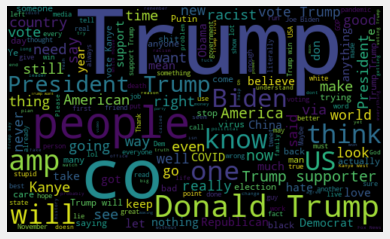

In [20]:
#Plot the word cloud

allWords = ' '.join([twts for twts in df['tweets']])
wordCloud = WordCloud(width= 500, height = 300, random_state= 25, max_font_size= 120).generate(allWords)
plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis('off')
plt.show();



In [21]:
#function to create positive, negative, neutral

def getAnalysis(score):
    if score< 0 :
        return 'Negative'
    elif score == 0 :
         return 'Neutral'
    else :
         return 'Positive'
        
df['Analysis']= df['Polarity'].apply(getAnalysis)

df.head()
df.to_csv('tweets_exported_cleaned_with_Classification.csv', encoding='utf-8')        
       

In [22]:
df.dtypes

tweets                  object
id                       int64
date            datetime64[ns]
source                  object
likes                    int64
retweets                 int64
Subjectivity           float64
Polarity               float64
Analysis                object
dtype: object

In [23]:
#Using the machine learning concepts : SVM model
print(df['tweets'].shape)

(9999,)


In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

k = cv.fit(df['tweets'])
print(k.vocabulary_)
print(cv.get_feature_names())


{'trump': 18172, 'people': 13507, 'are': 2564, 'sick': 16245, 'before': 3113, 'someone': 16584, 'tried': 18127, 'to': 17854, 'cancel': 3975, 'me': 11638, 'for': 7711, 'being': 3141, 'supporter': 17200, 'this': 17716, 'is': 9942, 'reference': 14912, 'fact': 7236, 'check': 4269, 'falsely': 7288, 'says': 15760, '99': 879, 'of': 12835, 'virus': 19071, 'cases': 4069, 'benign': 3182, 'co': 4547, '0ogrhrtbqs': 54, 'corruption': 5033, 'russia': 15587, 'all': 2233, 'the': 17646, 'above': 1849, 'bitch': 3322, 'ass': 2661, 'struggles': 17050, 'hold': 9018, 'cup': 5309, 'amfbxjdqqp': 2324, 'any': 2452, 'state': 16865, 'that': 17640, 'demands': 5666, 'mask': 11548, 'start': 16857, 'buying': 3882, 'full': 7928, 'face': 7221, 'donald': 6238, 'leka': 10908, 'neil': 12401, 'realistic': 14798, 'celebrity': 4151, 'republican': 15112, 'presidential': 14059, 'candidate': 3985, 'latex': 10788, 'head': 8787, 'hair': 8627, 'orange': 13020, 'adult': 2033, 'size': 16342, 's5rcncj914': 15637, 'fm5kvp2utt': 7657,

In [25]:
k = cv.transform(df['tweets'])
print(k.shape)
print(k.toarray())
dfcv = pd.DataFrame(k.toarray(), columns = cv.get_feature_names())
print(dfcv)

(9999, 20328)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
      00  000  000000  000dead  00hof2adog  ...  𝗱𝗶𝗲𝗱  𝗵𝗮𝘃𝗲  𝗽𝗲𝗼𝗽𝗹𝗲  𝟭𝟯𝟮𝗸  𝟰𝟱𝘅
0      0    0       0        0           0  ...     0     0       0     0    0
1      0    0       0        0           0  ...     0     0       0     0    0
2      0    0       0        0           0  ...     0     0       0     0    0
3      0    0       0        0           0  ...     0     0       0     0    0
4      0    0       0        0           0  ...     0     0       0     0    0
...   ..  ...     ...      ...         ...  ...   ...   ...     ...   ...  ...
9994   0    0       0        0           0  ...     0     0       0     0    0
9995   0    0       0        0           0  ...     0     0       0     0    0
9996   0    0       0        0           0  ...     0     0       0     0    0
9997   0    0       0        0           0  ...     0     0       0     0   

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer()

l = tfidfv.fit(df['tweets'])
print(l.vocabulary_)
print(tfidfv.get_feature_names())

{'trump': 18172, 'people': 13507, 'are': 2564, 'sick': 16245, 'before': 3113, 'someone': 16584, 'tried': 18127, 'to': 17854, 'cancel': 3975, 'me': 11638, 'for': 7711, 'being': 3141, 'supporter': 17200, 'this': 17716, 'is': 9942, 'reference': 14912, 'fact': 7236, 'check': 4269, 'falsely': 7288, 'says': 15760, '99': 879, 'of': 12835, 'virus': 19071, 'cases': 4069, 'benign': 3182, 'co': 4547, '0ogrhrtbqs': 54, 'corruption': 5033, 'russia': 15587, 'all': 2233, 'the': 17646, 'above': 1849, 'bitch': 3322, 'ass': 2661, 'struggles': 17050, 'hold': 9018, 'cup': 5309, 'amfbxjdqqp': 2324, 'any': 2452, 'state': 16865, 'that': 17640, 'demands': 5666, 'mask': 11548, 'start': 16857, 'buying': 3882, 'full': 7928, 'face': 7221, 'donald': 6238, 'leka': 10908, 'neil': 12401, 'realistic': 14798, 'celebrity': 4151, 'republican': 15112, 'presidential': 14059, 'candidate': 3985, 'latex': 10788, 'head': 8787, 'hair': 8627, 'orange': 13020, 'adult': 2033, 'size': 16342, 's5rcncj914': 15637, 'fm5kvp2utt': 7657,

In [27]:
l = tfidfv.transform(df['tweets'])
print(l.shape)
print(l.toarray())
print(l)
dftfidv = pd.DataFrame(l.toarray(), columns = tfidfv.get_feature_names())
dftfidv.to_csv('dataset.csv', encoding='utf-8')  
#dftfidv['Analysis']=df['Analysis']
print(dftfidv)

(9999, 20328)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
  (0, 18172)	0.13641532910619075
  (0, 16245)	0.798869771203562
  (0, 13507)	0.4483775624799655
  (0, 2564)	0.377035155000887
  (1, 18172)	0.060099839796703504
  (1, 18127)	0.37674423077838926
  (1, 17854)	0.1067870979746337
  (1, 17716)	0.1697112754484203
  (1, 17200)	0.27797511043327516
  (1, 16584)	0.3003874463488987
  (1, 14912)	0.48445990299471575
  (1, 11638)	0.24483177577049203
  (1, 9942)	0.11781231111936191
  (1, 7711)	0.1421462447473029
  (1, 3975)	0.4071326654759866
  (1, 3141)	0.2635128435794404
  (1, 3113)	0.28778167934477894
  (2, 19071)	0.2232591987362308
  (2, 18172)	0.05249081059077092
  (2, 15760)	0.24515288952598366
  (2, 12835)	0.1103395965344128
  (2, 7288)	0.36015934078746054
  (2, 7236)	0.28482992765485315
  (2, 4547)	0.10732578818201464
  (2, 4269)	0.31176775628063186
  :	:
  (9998, 14648)	0.149

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7999, 20328) (7999,)
Test set: (2000, 20328) (2000,)


In [20]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
# Perform classification with SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(X_train, y_train)
t1 = time.time()


In [19]:
prediction_linear = classifier_linear.predict(X_test)
prediction_linear[0:5]

array(['Neutral', 'Neutral', 'Negative', 'Neutral', 'Negative'],
      dtype=object)

In [20]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_linear))

DecisionTrees's Accuracy:  0.7366666666666667


In [21]:
print(y_test +" |"+prediction_linear)

571       Neutral |Neutral
1674      Neutral |Neutral
2858    Negative |Negative
331       Neutral |Neutral
1295    Negative |Negative
               ...        
1154      Neutral |Neutral
2830      Neutral |Neutral
1827    Positive |Positive
1549    Positive |Negative
2132    Positive |Positive
Name: Analysis, Length: 600, dtype: object


In [ ]:
#Using the machine learning concepts : Naive Bayes Theorem

In [22]:
!pip install nltk

In [23]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
#vectorizer

stopset= set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, strip_accents = 'ascii', stop_words= stopset)

y=df['Analysis']
X=vectorizer.fit_transform(df.tweets)



nbtfidv = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())

#dftfidv['Analysis']=df['Analysis']
print(nbtfidv)

      000   01  01bgslc0rc   02  ...  zz7kv9anhv  zzhulmj9gx  zzpjjxeein  zzxwstfwcq
0     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
1     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
3     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
4     0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
...   ...  ...         ...  ...  ...         ...         ...         ...         ...
2995  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2996  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2997  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2998  0.0  0.0         0.0  0.0  ...         0.0         0.0         0.0         0.0
2999  0.0  0.0         0.0  0.0  ...         0.0         0.0     

In [26]:
print(y.shape)
print(X.shape)


(3000,)
(3000, 8879)


In [27]:
#test train split data
#X_train, X_test, y_train, y_test = train_test_split( dftfidv, df['Analysis'], test_size=0.2, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(nbtfidv,y,test_size=0.2,random_state=42)

In [28]:
#train naive bayes classifier

naive_bayes = MultinomialNB()
naive_bayes.fit(X_train,y_train)
MultinomialNB()
#print(naives_bayes.predict(X[2:3]))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [29]:
prediction_naive_bayes = naive_bayes.predict(X_test)
prediction_naive_bayes[0:5]

array(['Positive', 'Negative', 'Negative', 'Positive', 'Neutral'],
      dtype='<U8')

In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, prediction_naive_bayes))

DecisionTrees's Accuracy:  0.6616666666666666


In [ ]:
print(y_test +" |"+prediction_naive_bayes)

1501    Negative |Negative
2586      Neutral |Neutral
2653     Neutral |Positive
1055    Negative |Negative
705       Neutral |Neutral
               ...        
4711      Neutral |Neutral
2313     Neutral |Positive
3214    Negative |Positive
2732      Neutral |Neutral
1926     Positive |Neutral
Name: Analysis, Length: 1000, dtype: object


In [31]:
#positive tweets

print("positive tweets :")
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

positive tweets :
1) sir you are surgeon by profession as per your twitter profile please check what kind of blood is running in ur/bjp body if it was indian you would have preferred to evict china than wasting your precious time in fighting with rahul gandhi n congress is bjp afraid of rahul gandhi?

2) I really sometimes feel Rahul Gandhi is like a shadow of Modi wherever Modi goes Rahul Gandhi follows him and this image proved me right

3)PM Modi has the second toughest job in India, Rahul Gandhi’s sign language interpreter has the first. Lifted from here .co/ADdcyPD0GG

4)  Congress must answer really 😂😂
Why not you demand resignation of Rahul Gandhi from India PM post .

5)_01 _Modi_Bhakt _ But why congress is keen to know the armh deployment whereabouts and more over what agreement did rahul gandhi your leader signed with china. mullaji

6)_ Good Job Nizami... once old #pidis tire out, there will be race to become fav pet of Rahul Gandhi.

You surely have seen future and working 

In [ ]:
#negative tweets


print("negative tweets : ")
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

negative tweets : 
1)Rauf Khan ( Rahul Gandhi ) say Sorry to Army and Nation. .co/hlzj2VL2VO

2) The most pathetic leader india has ever had shame on you rahul gandhi for using your own party workers to spread the false and fake narrative provoking enemies to take the benefit from your remarks.
India needs new opposition. You have became blind while hating modi and BJP govt.

3)FACT CHECK: Rahul Gandhi passes off Congress functionaries as ordinary
 .co/wHNYQ6ji48

4) ya absolutely no doubt🤣🤣
i applaud him for his knowledge base and orating skill,
i m still searching a leader frm opposition who can take him on fact, bt none, gaurabh vallabh rose and sank, and den none, 
...
anyway rahul gandhi still the leader in comefy🤣

5)     I dont know what kind of people they are who support useless person like Rahul Gandhi. He is a son of  Late RAJIV Gandhi that sit. He is nothing.

6)  #FactCheck :  passes off #Congress functionaries as ordinary #Ladakhis to slam Prime Minister  

The Truth.

#A

In [ ]:
#neutral tweets


print("Neutral tweets :")

j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Neutral'):
        print(str(j) + ')' + sortedDF['tweets'][i]) 
        print()
        j=j+1

Neutral tweets :
1) _IN Even intelligent people in Congress are infected with a moron virus called Rahul Gandhi.

2) Thats just Rahul Gandhi accompanying the PM to Leh

3) Rahul Gandhi accompanied the PM to Leh

4) Tumh Jaise logo ko sharm nhi atti bilkul BHI😂😂😂
Nxt time try to demand resignation of Rahul Gandhi from PM post of India

5) Bhaiya But no one is watching and commenting on the video, why that woman is beaten?
Forget Rahul Gandhi, chk the video and have some sympathy with that woman..
🙏🙏🙏🙏

6)_rathee You and Rahul Gandhi 🤦‍♀️

7) grow up! 
.co/fyMTbzQGza

8) I nominate this person for Rahul Gandhi Award for 2020.

9)Please for once just go and search on Google ' Rahul Gandhi or Roll Vinci' 
#hypocritesVadraCong

10) Option            =    Result 
Reservations = Rahul Gandhi
Merit                =  Narendra Modi
Let the public decide.

11) from today Its my only goal to educate you in twitter. and explain you why you are a traitor and you must learn how to respect India and s

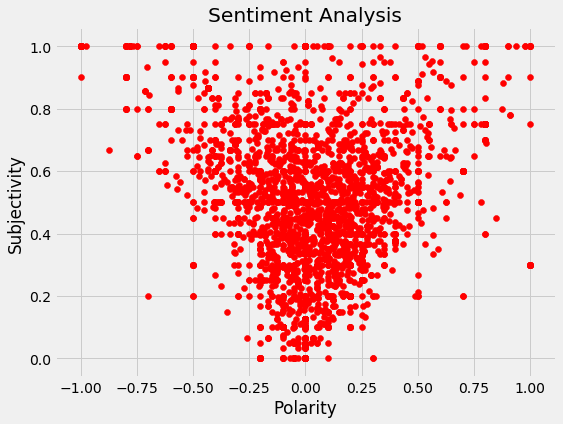

In [ ]:
#PLot the polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i], color= 'Red')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()
    

In [ ]:
#percentage of tweets

ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['tweets']
p =round (ptweets.shape[0] / df.shape[0] * 100, 1 )
print("positive tweets percentage : " + str(p))


ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['tweets']
n= round (ntweets.shape[0] / df.shape[0] * 100, 1 )
print("negative tweets percentage : " + str(n))

netweets = df[df.Analysis == 'Neutral']
netweets = netweets['tweets']
ne= round (netweets.shape[0] / df.shape[0] * 100, 1 )
print("neutral tweets percentage : " + str(ne))

positive tweets percentage : 33.6
negative tweets percentage : 30.2
neutral tweets percentage : 36.2


In [ ]:
#value counts 

df['Analysis'].value_counts()

Neutral     1809
Positive    1680
Negative    1511
Name: Analysis, dtype: int64

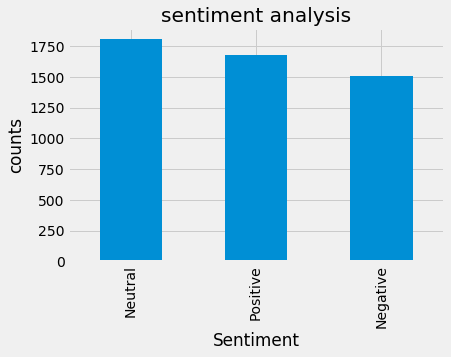

In [ ]:
#plot the graph

plt.title('sentiment analysis')
plt.xlabel('Sentiment')
plt.ylabel('counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()

How people are reacting on Rahul Gandhi by analyzing 5000 Tweets : 


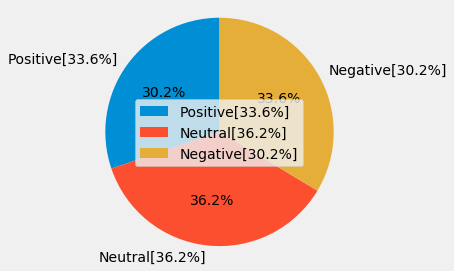

In [ ]:
import matplotlib.pyplot as plt

print("How people are reacting on " + searchTerm + " by analyzing " + str(noofsearch) + " Tweets : ")

labels=[r'Positive['+str(p)+'%]',r'Neutral['+str(ne)+'%]', r'Negative['+str(n)+'%]']
sizes = [n, ne, p]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(loc="center")
plt.tight_layout()
plt.show()


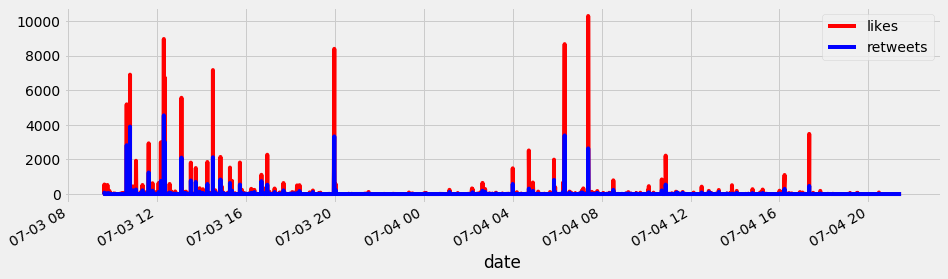

In [ ]:
time_likes = pd.Series(data=df['likes'].values, index=df['date'])
time_likes.plot(figsize=(16,4), label= "likes", legend= True, color = 'r')
time_retweets = pd.Series(data=df['retweets'].values, index=df['date'])
time_retweets.plot(figsize=(14,4), label= "retweets", legend= True, color = 'b')
plt.show()